## K- Nearest Neighbours

Steps:
  - For a new data point, measure it's euclidean distance from to the point to the k nearest points
  - Select the class to which majority of the k points belong to



In [12]:
## Imports

import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [10]:

def euclidean_distance(p, q):
    return np.sqrt(np.sum((np.array(p) - np.array(q)) ** 2))

class KNN:
    def __init__(self,k):
        self.k = k

    def fit(self, points):
        self.points = points

    def predict(self,new_point):

    #     ### Measure distance between the new point and the data points
        distances = []
        for category in self.points:
            for point in self.points[category]:
                distance = euclidean_distance(point, new_point)
                distances.append([distance, category])

        ## List of categories of k nearest data points
        k_categories = [i[1] for i in sorted(distances)[:self.k]]

        ## Select the most common category from above list
        top_cat = Counter(k_categories).most_common(1)[0][0]

        ## Return the result
        return top_cat
        

In [ ]:
## dummy training data
points = {'blue': [[2,4], [1,3], [2,3], [3,2], [2,1]],
          'orange': [[5,6], [4,5], [4,6], [6,6], [5,4]]}
new_point = [3,3]


knn_obj = KNN(k=3)
knn_obj.fit(data)
y = knn_obj.predict(new_point)

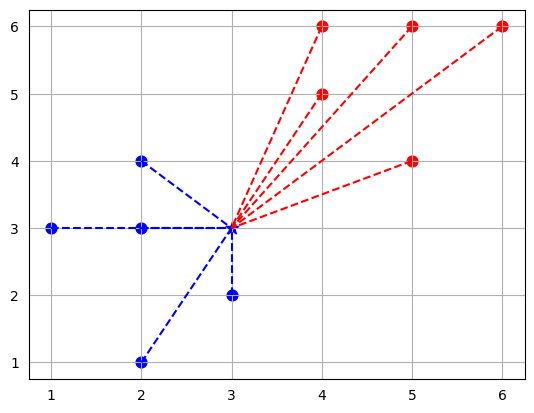

In [28]:
## Visualisation

ax = plt.subplot()
ax.grid()
# ax.set_facecolor('black')
ax.tick_params(axis = 'x', color = 'white')
ax.tick_params(axis = 'y', color = 'white')


## Plot blue data points
for point in data['blue']:
    ax.scatter(point[0], point[1] , s = 60, color = 'blue')

## Plot red data points
for point in data['red']:
    ax.scatter(point[0], point[1] , s = 60, color = 'red')

## Plot the new data point
ax.scatter(new_point[0], new_point[1], s = 90, color = y, marker = '*')

## Draw lines from blue data points to new point
for point in data['blue']:
    ax.plot([point[0], new_point[0]], [point[1], new_point[1]] , linestyle = '--', color = 'blue')

## Draw lines from red data points to new point
for point in data['red']:
    ax.plot([point[0], new_point[0]], [point[1], new_point[1]] , linestyle = '--', color = 'red')

## SKlearn implementation

In [37]:
from sklearn.neighbors import KNeighborsClassifier


In [38]:
x = [4, 5, 10, 4, 3, 11, 14 , 8, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
classes = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]

In [39]:
data = list(zip(x,y))

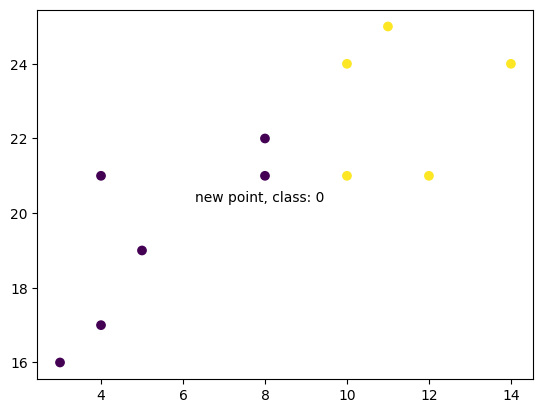

In [41]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(data, classes)
new_x = 8
new_y = 21
new_point = [(new_x, new_y)]

prediction = knn.predict(new_point)

plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show()